# NYCDOE 2017 Math Scores

My goal in this project is to understand the relationships between math scores and schools. 

To do this, I first imported the relevant libraries (pandas, matplotlib, and numpy). Next, I read in three datasets into this Jupyter Notebook file. Afterwards, I did some tidying up which includes renaming columns, subsetting data to 2017, and creating columns for future merges.

In [1]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np


# Make sure notebook prints plots
%matplotlib inline

In [2]:
#read csv files
math_results = pd.read_csv('2013-2017_School_Math_Results_-_All.csv')
attendance = pd.read_csv('2015-2018_Historical_Daily_Attendance_By_School.csv')

#copy csv files as new data.frames 
math_results_clean = math_results
attendance_clean = attendance

In [3]:
math_results_clean = math_results_clean[math_results_clean.Year == 2017]
math_results_clean = math_results_clean.rename(columns={
    "Mean Scale Score": "Mean_Scale_Score",
    "Level3+4_%": "Level_3_4_Perc"
})
math_results_clean.head()

,DBN,School Name,Grade,Year,Category,Number Tested,Mean_Scale_Score,Level1_N,Level1_%,Level2_N,Level2_%,Level3_N,Level3_%,Level4_N,Level4_%,Level3+4_N,Level_3_4_Perc
4,01M015,PS 015 ROBERTO CLEMENTE,3,2017,All Students,29,302,8,27.6,9,31.0,7,24.1,5,17.2,12,41.4
9,01M015,PS 015 ROBERTO CLEMENTE,4,2017,All Students,23,301,6,26.1,8,34.8,8,34.8,1,4.3,9,39.1
14,01M015,PS 015 ROBERTO CLEMENTE,5,2017,All Students,17,322,2,11.8,5,29.4,8,47.1,2,11.8,10,58.8
19,01M015,PS 015 ROBERTO CLEMENTE,All Grades,2017,All Students,69,307,16,23.2,22,31.9,23,33.3,8,11.6,31,44.9
24,01M019,PS 019 ASHER LEVY,3,2017,All Students,28,313,7,25.0,6,21.4,8,28.6,7,25.0,15,53.6


In [4]:
attendance_clean = attendance_clean.rename(columns={
    "School": "DBN"
})
attendance_clean.head()

,DBN,Date,SchoolYear,Enrolled,Present,Absent,Released
0,01M015,01/04/2016,20152016,168,157,11,0
1,01M015,01/05/2016,20152016,168,153,15,0
2,01M015,01/06/2016,20152016,168,163,5,0
3,01M015,01/07/2016,20152016,168,154,14,0
4,01M015,01/08/2016,20152016,168,158,10,0


### Abs_rate

It was not optimal to use raw numbers to compare schools as schools across the city vary in size. Rather than use raw `Absent` numbers, I created a new column called `Abs_rate`. I spot checked this data.frame and came to a conclusion that the column values indicate absent + present = enrolled. The column, `Abs_rate` divides the number of absent students by the number of total enrolled per day. 

In [5]:
attendance_clean['Abs_rate'] = attendance_clean['Absent']/attendance_clean['Enrolled']
attendance_clean = attendance_clean[attendance_clean.SchoolYear == 20162017]
attendance_clean.head()

,DBN,Date,SchoolYear,Enrolled,Present,Absent,Released,Abs_rate
178,01M015,01/03/2017,20162017,173,147,26,0,0.150289
179,01M015,01/04/2017,20162017,173,166,7,0,0.040462
180,01M015,01/05/2017,20162017,170,161,9,0,0.052941
181,01M015,01/06/2017,20162017,170,155,15,0,0.088235
182,01M015,01/09/2017,20162017,170,158,12,0,0.070588


### Grouping

This original CSV file included breakdowns of attendance by school and individual date. This data was a little too detailed for my high level analysis. 

Pandas' `groupby()` function splits data into groups based on some criteria. In this instance, I grouped the data by school (via `DBN`) and then school year. I opted to consolidate individual rows per group by mean values. Another option was to consolidate indivdiual rows per group by median values, however, I did not see too much difference between calculating the mean vs. median in my cursory analysis.

In [6]:
attendance_clean_grouped = attendance_clean.groupby(['DBN', 'SchoolYear']).mean()
attendance_clean_grouped.head()

,,Enrolled,Present,Absent,Released,Abs_rate
DBN,SchoolYear,,,,,
01M015,20162017,173.954545,162.539773,11.329545,0.085227,0.065067
01M019,20162017,269.346591,243.738636,25.477273,0.130682,0.094656
01M020,20162017,537.375000,497.375000,39.761364,0.238636,0.074058
01M034,20162017,349.409091,317.477273,31.823864,0.107955,0.091072
01M063,20162017,200.715909,185.721591,14.727273,0.267045,0.073371


## ANALYSIS: How do avg absence rates correlate with mean scale scores? 

My intuition tells me that a school's absence rate has a negative relationship with mean scale scores. This means that a lower absence rate is correlated with higher mean scale scores-- the less absences among students in a school, the better the score.

To derive at a data-driven answer to my question, I merged the `math_results_clean` df with the `attendance_clean_grouped` df. Next, I used a left join to return all of the rows from the left table (the `math_results_clean` df) and only matched rows from the right table (the `attendance_clean_grouped` df) where the merge condition (same `DBN`) was fulfilled. In the event there is no data to merge on, the merged column values will show `NaN`. 

In [7]:
math_attendance_merged = math_results_clean.merge(attendance_clean_grouped, on='DBN', how='left')
math_attendance_merged.head()

,DBN,School Name,Grade,Year,Category,Number Tested,Mean_Scale_Score,Level1_N,Level1_%,Level2_N,...,Level3_%,Level4_N,Level4_%,Level3+4_N,Level_3_4_Perc,Enrolled,Present,Absent,Released,Abs_rate
0,01M015,PS 015 ROBERTO CLEMENTE,3,2017,All Students,29,302,8,27.6,9,...,24.1,5,17.2,12,41.4,173.954545,162.539773,11.329545,0.085227,0.065067
1,01M015,PS 015 ROBERTO CLEMENTE,4,2017,All Students,23,301,6,26.1,8,...,34.8,1,4.3,9,39.1,173.954545,162.539773,11.329545,0.085227,0.065067
2,01M015,PS 015 ROBERTO CLEMENTE,5,2017,All Students,17,322,2,11.8,5,...,47.1,2,11.8,10,58.8,173.954545,162.539773,11.329545,0.085227,0.065067
3,01M015,PS 015 ROBERTO CLEMENTE,All Grades,2017,All Students,69,307,16,23.2,22,...,33.3,8,11.6,31,44.9,173.954545,162.539773,11.329545,0.085227,0.065067
4,01M019,PS 019 ASHER LEVY,3,2017,All Students,28,313,7,25.0,6,...,28.6,7,25.0,15,53.6,269.346591,243.738636,25.477273,0.130682,0.094656


To conduct basic summary statistics, I converted the most relevant columns into numeric values. An error message alerted me to the fact that some schools had "s" listed as their "Mean_Scale_Score". In an ideal world, I would consult a data dictionary or dataset owner to understand what "s" might indicate. For the purpose of this exercise, I found most practical to omit these rows. From there, I coerced the remaining values to numeric values.

In [8]:
s = math_attendance_merged[math_attendance_merged.Mean_Scale_Score == "s"]
s.head()

,DBN,School Name,Grade,Year,Category,Number Tested,Mean_Scale_Score,Level1_N,Level1_%,Level2_N,...,Level3_%,Level4_N,Level4_%,Level3+4_N,Level_3_4_Perc,Enrolled,Present,Absent,Released,Abs_rate
76,01M363,NEIGHBORHOOD SCHOOL,3,2017,All Students,5,s,s,s,s,...,s,s,s,s,s,301.738636,282.568182,19.170455,0.000000,0.063482
232,02M225,ELLA BAKER SCHOOL,8,2017,All Students,3,s,s,s,s,...,s,s,s,s,s,306.731429,286.034286,20.651429,0.045714,0.067430
276,02M347,THE 47 AMERICAN SIGN LANGUAGE & ENGLISH LOWER ...,5,2017,All Students,1,s,s,s,s,...,s,s,s,s,s,193.022727,177.295455,15.545455,0.181818,0.080602
278,02M347,THE 47 AMERICAN SIGN LANGUAGE & ENGLISH LOWER ...,7,2017,All Students,5,s,s,s,s,...,s,s,s,s,s,193.022727,177.295455,15.545455,0.181818,0.080602
866,06M513,CASTLE BRIDGE SCHOOL,5,2017,All Students,4,s,s,s,s,...,s,s,s,s,s,224.680000,210.817143,13.862857,0.000000,0.061581


In [9]:
math_attendance_merged = math_attendance_merged.drop(math_attendance_merged[math_attendance_merged['Mean_Scale_Score']=='s'].index)

In [10]:
math_attendance_merged.Mean_Scale_Score= pd.to_numeric(math_attendance_merged.Mean_Scale_Score)


From there, I grabbed some basic statistics on all of the numeric columns. 

 - After some data wrangling, there were about 4,800 schools represented in this subsetted dataset 
 - The mean scale math score is about 300 and the median is 298 (min 234 and max 383)
 - On average, about 35% of students attained a Level 3-4 on their math test. (median 35%)
 - The mean and median absence rate are both about 7% (min ~2% and max ~29%)

In [11]:
math_attendance_merged.describe()

,Year,Number Tested,Mean_Scale_Score,Enrolled,Present,Absent,Released,Abs_rate
count,4813.0,4813.000000,4813.000000,4798.000000,4798.000000,4798.000000,4798.000000,4798.000000
mean,2017.0,157.155828,300.452317,625.908975,581.931804,41.780012,2.197160,0.071832
std,0.0,178.425428,22.682539,348.863830,332.311524,22.315577,7.988757,0.026256
min,2017.0,6.000000,234.000000,74.914773,67.119318,4.886364,0.000000,0.017302
25%,2017.0,60.000000,283.000000,372.591463,342.409091,25.284091,0.039773,0.052694
50%,2017.0,98.000000,298.000000,556.672316,509.196023,37.630682,0.232955,0.068350
75%,2017.0,176.000000,316.000000,788.045455,730.585227,53.363636,0.492898,0.088279
max,2017.0,2019.000000,383.000000,2197.977273,2084.681818,139.610169,89.271186,0.290719


### Corr plot

The scatterplot below affirms my intuition: school absence rates have a negative relationship with mean scale scores.

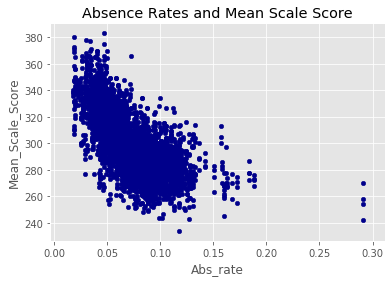

In [12]:
abs_score = math_attendance_merged.plot.scatter(x='Abs_rate',
                      y='Mean_Scale_Score',
                      c='DarkBlue',
                      title='Absence Rates and Mean Scale Score')

### Correlation

Correlations can exist between from -1 to 1. There is a moderately negative correlation between absence rates and mean scale scores. 

In [13]:
math_attendance_merged['Abs_rate'].corr(math_attendance_merged['Mean_Scale_Score'])


-0.6784748698762914

## ANALYSIS: How do level 3-4 test rates correlate with mean scale scores? 

It would make a lot of sense for higher level 3-4 test rates to correlate with higher mean scale scores. But how strong is this correlation? 

In [14]:
math_attendance_merged.Level_3_4_Perc= pd.to_numeric(math_attendance_merged.Level_3_4_Perc)

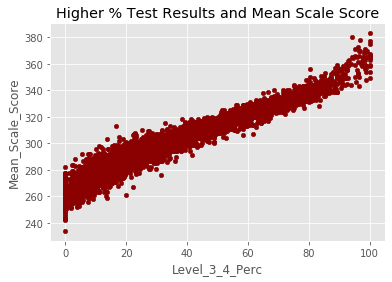

In [15]:
abs_score = math_attendance_merged.plot.scatter(x='Level_3_4_Perc',
                      y='Mean_Scale_Score',
                      c='DarkRed',
                      title='Higher % Test Results and Mean Scale Score')

This makes a lot of sense. We see a very strong postive correlation-- nearly a perfect 1-- between high level 3-4% grade scores and mean scale scores. 

In [16]:
math_attendance_merged['Level_3_4_Perc'].corr(math_attendance_merged['Mean_Scale_Score'])


0.9668848748880041

## ANALYSIS: Top Five and Bottom Five Schools by Avg Math Scores

There are a number of factors that might contribute to a schools' average math scores. Some may include school district resources, individual student/family resources, socioeconomic status, English proficiency level, quality of instruction, and general test preparation. 

For this analysis, I looked up the top five and bottom five performing schools. Performance was indicated by `Mean_scale_score`. 

In [17]:
math_attendance_merged_grouped = math_attendance_merged.groupby(['DBN']).mean()
math_attendance_merged_grouped.head()

,Year,Number Tested,Mean_Scale_Score,Level_3_4_Perc,Enrolled,Present,Absent,Released,Abs_rate
DBN,,,,,,,,,
01M015,2017.0,34.500000,308.000000,46.050000,173.954545,162.539773,11.329545,0.085227,0.065067
01M019,2017.0,42.000000,315.500000,50.975000,269.346591,243.738636,25.477273,0.130682,0.094656
01M020,2017.0,104.000000,292.500000,32.225000,537.375000,497.375000,39.761364,0.238636,0.074058
01M034,2017.0,60.571429,291.142857,18.585714,349.409091,317.477273,31.823864,0.107955,0.091072
01M063,2017.0,32.500000,309.000000,43.625000,200.715909,185.721591,14.727273,0.267045,0.073371


In [18]:
top_5 = math_attendance_merged_grouped.nlargest(5, 'Mean_Scale_Score')
print(top_5)

bottom_5 = math_attendance_merged_grouped.nsmallest(5, 'Mean_Scale_Score')
print(bottom_5)

          Year  Number Tested  Mean_Scale_Score  Level_3_4_Perc    Enrolled  \
DBN                                                                           
20K187  2017.0     414.500000        373.250000       96.025000  891.176136   
28Q303  2017.0      36.000000        366.000000      100.000000  208.193182   
03M859  2017.0      22.333333        365.833333      100.000000  312.214689   
03M334  2017.0     100.000000        365.000000       97.683333  550.920455   
30Q580  2017.0     113.000000        365.000000       99.100000  516.559322   

           Present     Absent   Released  Abs_rate  
DBN                                                 
20K187  874.017045  17.085227   0.073864  0.019174  
28Q303  200.960227   6.823864   0.409091  0.032764  
03M859  289.005650  14.570621   8.638418  0.046684  
03M334  534.386364  16.534091   0.000000  0.030035  
30Q580  478.022599  19.734463  18.802260  0.038223  
          Year  Number Tested  Mean_Scale_Score  Level_3_4_Perc    Enrolled

I imported the [2013 - 2018 Demographic Snapshot School](https://data.cityofnewyork.us/Education/2013-2018-Demographic-Snapshot-School/s52a-8aq6) dataset from NYC Open Data to gain a better understanding of the schools' student profile. From there, I merged this data.frame with my top 5 and bottom 5 data.frames.

In [19]:
dem_snapshot = pd.read_csv('2013_-_2018_Demographic_Snapshot_School.csv',
                           usecols = ['DBN', 'School Name',
                            'Year', 'Total Enrollment', '% English Language Learners', '% Poverty',
                                     'Economic Need Index'])
dem_snapshot_clean = dem_snapshot
dem_snapshot_clean.head()

,DBN,School Name,Year,Total Enrollment,% English Language Learners,% Poverty,Economic Need Index
0,01M015,P.S. 015 Roberto Clemente,2013-14,190,10.0,90.0,No Data
1,01M015,P.S. 015 Roberto Clemente,2014-15,183,9.3,92.3,93.5%
2,01M015,P.S. 015 Roberto Clemente,2015-16,176,9.1,84.7,89.6%
3,01M015,P.S. 015 Roberto Clemente,2016-17,178,6.7,85.4,89.2%
4,01M015,P.S. 015 Roberto Clemente,2017-18,190,4.2,84.7,89.0%


In [20]:
dem_snapshot_clean = dem_snapshot_clean[dem_snapshot_clean.Year == '2016-17']
dem_snapshot_clean.head()

,DBN,School Name,Year,Total Enrollment,% English Language Learners,% Poverty,Economic Need Index
3,01M015,P.S. 015 Roberto Clemente,2016-17,178,6.7,85.4,89.2%
8,01M019,P.S. 019 Asher Levy,2016-17,271,3.3,76.4,58.2%
13,01M020,P.S. 020 Anna Silver,2016-17,540,17.2,58.3,68.0%
18,01M034,P.S. 034 Franklin D. Roosevelt,2016-17,350,7.7,99.4,86.8%
23,01M063,The STAR Academy - P.S.63,2016-17,200,2.5,82.5,67.9%


In [21]:
dem_snapshot_clean = dem_snapshot_clean.rename(columns={
    "School Name": "school_name",
    "Economic Need Index": "Eco_Need_Index",
    "% Poverty": "Perc_Poverty",
    "% English Language Learners": "Perc_ELL"
})

The top 5 schools were:

 - The Christa McAuliffe School\I.S. 187
 - The Academy for Excellence through the Arts
 - Special Music School
 - The Anderson School
 - Baccalaureate School for Global Education
 
These schools were generally small in size, had a small ELL student percentage, and relatively low/moderate economic need indices. The Christa McAuliffe School\I.S. 187 was an outlier among the five schools, however, with a relatively moderate to high poverty rate.

In [22]:
top_5_merged = top_5.merge(dem_snapshot_clean, on='DBN', how='left')
top_5_merged

,DBN,Year_x,Number Tested,Mean_Scale_Score,Level_3_4_Perc,Enrolled,Present,Absent,Released,Abs_rate,school_name,Year_y,Total Enrollment,Perc_ELL,Perc_Poverty,Eco_Need_Index
0,20K187,2017.0,414.500000,373.250000,96.025000,891.176136,874.017045,17.085227,0.073864,0.019174,The Christa McAuliffe School\I.S. 187,2016-17,892,2.9,63.2,43.9%
1,28Q303,2017.0,36.000000,366.000000,100.000000,208.193182,200.960227,6.823864,0.409091,0.032764,The Academy for Excellence through the Arts,2016-17,208,0.5,24.0,16.1%
2,03M859,2017.0,22.333333,365.833333,100.000000,312.214689,289.005650,14.570621,8.638418,0.046684,Special Music School,2016-17,314,0.6,18.2,27.0%
3,03M334,2017.0,100.000000,365.000000,97.683333,550.920455,534.386364,16.534091,0.000000,0.030035,The Anderson School,2016-17,551,0.0,8.2,11.1%
4,30Q580,2017.0,113.000000,365.000000,99.100000,516.559322,478.022599,19.734463,18.802260,0.038223,Baccalaureate School for Global Education,2016-17,518,0.6,42.3,25.6%


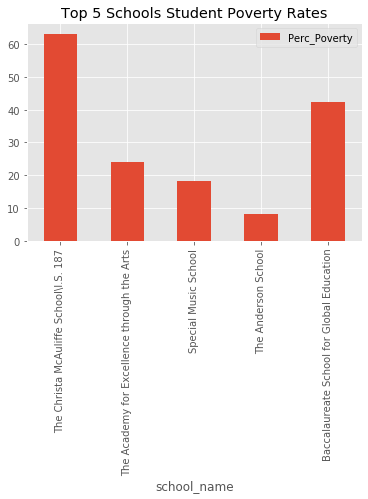

In [23]:
top_5_merged_plot = top_5_merged.plot(kind = 'bar', x='school_name', y='Perc_Poverty',
                                     title='Top 5 Schools Student Poverty Rates')

The bottom 3 schools included:

 - KAPPA IV
 - New Directions Secondary School
 - Lyons Community School

Two schools (DBN 16K584 and 09X145) were not merged successfully. This missing data is significant. One hypothesis is that perhaps the school did not have adequate reporting mechanisms in place.

On average, these three schools were considerably smaller than the other schools in enrollment and had very high poverty rates and economic need indices.

In [24]:
bottom_5_merged = bottom_5.merge(dem_snapshot_clean, on='DBN', how='left')
bottom_5_merged

,DBN,Year_x,Number Tested,Mean_Scale_Score,Level_3_4_Perc,Enrolled,Present,Absent,Released,Abs_rate,school_name,Year_y,Total Enrollment,Perc_ELL,Perc_Poverty,Eco_Need_Index
0,16K584,2017.0,28.0,254.75,0.000,74.914773,67.119318,7.369318,0.426136,0.098591,NaN,NaN,NaN,NaN,NaN,NaN
1,05M302,2017.0,70.5,255.50,2.100,148.363636,130.875000,17.488636,0.000000,0.117441,KAPPA IV,2016-17,145.0,15.2,89.7,86.6%
2,09X350,2017.0,42.0,256.00,2.575,238.050847,158.971751,69.265537,9.813559,0.290719,New Directions Secondary School,2016-17,251.0,36.7,80.9,88.8%
3,09X145,2017.0,107.0,257.25,4.350,276.431818,254.732955,21.306818,0.392045,0.077114,NaN,NaN,NaN,NaN,NaN,NaN
4,14K586,2017.0,67.5,258.00,0.700,508.477273,402.738636,81.340909,24.397727,0.159993,Lyons Community School,2016-17,516.0,11.8,89.1,82.5%


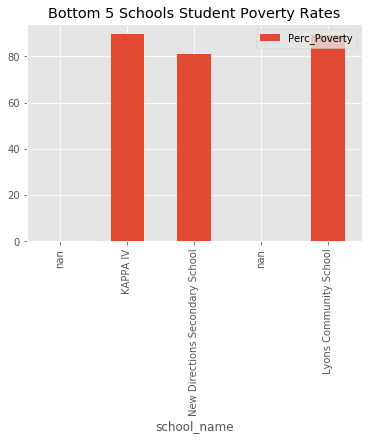

In [25]:
bottom_5_merged_plot = bottom_5_merged.plot(kind = 'bar', x='school_name', y='Perc_Poverty',
                                           title='Bottom 5 Schools Student Poverty Rates')

## Conclusion

These graphs suggest that poverty rates play a role in test results. 

Some noteworthy caveats in my research include:
 - time limitations
 - missing data
 - missing data dictionaries
 - a limited date range scope (2016-2017 academic year)
 
Some recommendations for future analysis: 

 - Consider other subsets--  by year? by grade level? 
  - I chose 2016-2017 because it was the most recent year among all three datasets 
 - Test different regression specifications to assess the significance of different variables in school and student demographics, whether it be absence rates, student poverty levels, school age, etc.
  - I ran a regression with X: abs_rate and Y: mean_scale_score. There was a pos correlation between the two which seemed odd (a higher absence rate → higher test scores ¯\_(ツ)_/¯?)
 - Test different regression specifications to rule out confounding factors or omitted variable bias
  - Fixed effect models


